<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/StreetIntersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.0 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
place_name = "Porto, Portugal"

In [4]:
G = ox.graph_from_place(place_name, network_type='drive')

In [7]:
intersections = ox.graph_to_gdfs(G, nodes=True, edges=False)

# Filter more than 2
filtered_intersections = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree > 2])]


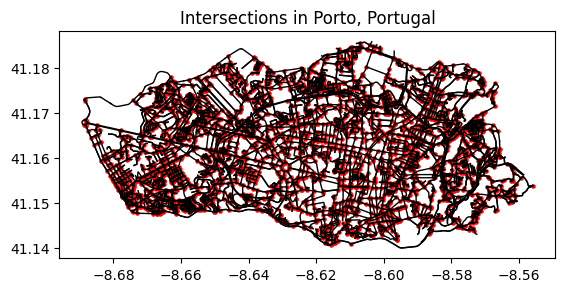

In [18]:
#Plot only edges without nodes
fig, ax = plt.subplots()
for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=1)

#Plot only real intersections(more than 2 streets)
filtered_intersections.plot(ax=ax, color='red', markersize=5)

ax.set_title("Intersections in {}".format(place_name))
plt.show()
